Drug: Pyridoxal Phosphate


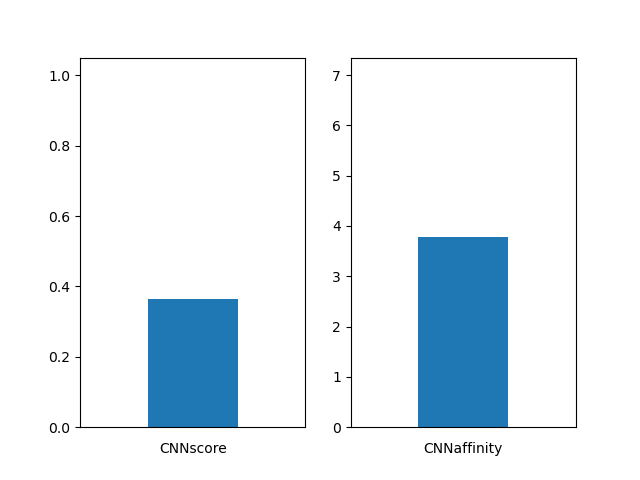

In [31]:
import py3Dmol
from rdkit import Chem
from rdkit.Chem import AllChem
from ipywidgets import interact, interactive, fixed, widgets
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
from futils import loaders
prot = "/home/amfaber/Masters/POR-DD/data/raw_data/cyp_screen/protein.pdb"
ligstr = "/home/amfaber/Masters/POR-DD/data/from_remote/cyp_equibind_no_rdkit.sdf"
cnndatapath = "/home/amfaber/Masters/POR-DD/data/gnina_processed/load_once_gnina.txt"
cnndata = loaders.load_bulk2(cnndatapath)
cnndata = cnndata.set_index(["name"])

with open(prot) as file:
    protstring = file.read()
ligs = [lig for lig in Chem.SDMolSupplier(ligstr)]

p = py3Dmol.view(width=600,height=600)
lig = Chem.SDMolSupplier(ligstr)[0]
p.addModel(protstring)
# p.setStyle({"model": -1}, {"cartoon": {"color": "spectrum"}})
p.setStyle({"model": -1}, {"cartoon": {}})
p.addModel(Chem.MolToMolBlock(lig), "sdf")
p.setStyle({"model": -1}, {"stick": {}})
p.zoomTo()

%matplotlib widget
def setframe(p, i, ligs, key = list(range(len(ligs)))):
    idx = key[i]
    p.removeModel()
    p.addModel(Chem.MolToMolBlock(ligs[idx]), "sdf")
    p.setStyle({"model": -1}, {"stick": {}})
    # p.setStyle({"model": -1}, {"stick": {"color": "red"}})
    return p.show()

i = widgets.BoundedIntText(
    value=1,
    min=0,
    max=len(ligs),
    step=1,
    description='Index:',
)

def printer(i, key = list(range(len(ligs)))):
    idx = key[i]
    print(f"Drug: {ligs[idx].GetProp('_Name')}")


out1 = widgets.interactive_output(setframe, {"p": fixed(p), "i": i, "ligs": fixed(ligs)})
out2 = widgets.Output()
out3 = widgets.interactive_output(printer, {"i": i})
with out2:
    fig, axes = plt.subplots(1, 2)
scorebar = axes[0].bar([0], [1])
affinitybar = axes[1].bar([0], [cnndata["CNNaffinity"].max() * 1.1])
def updatebar(change, key = list(range(len(ligs)))):

    idx = key[change.new]
    name = ligs[idx].GetProp("_Name").replace(" ", "_")
    
    scorebar[0].set_height(cnndata.loc[name, "CNNscore"])
    affinitybar[0].set_height(cnndata.loc[name, "CNNaffinity"])

axes[0].xaxis.set_ticklabels([])
axes[0].tick_params(bottom = False)
axes[0].set_xlabel("CNNscore")
axes[0].set_xlim((-1, 1))

axes[1].xaxis.set_ticklabels([])
axes[1].tick_params(bottom = False)
axes[1].set_xlabel("CNNaffinity")
axes[1].set_xlim((-1, 1))

i.observe(updatebar, "value")
i.value = 0
sideview = widgets.HBox([out1, out2])
display(sideview)
display(widgets.HBox([i, out3]))
